# Analog Clock Image Predictor 

In [31]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import random

In [32]:
data = np.load("clock_data.npy")
labels = np.load("clock_labels.npy")

In [33]:
data = np.asarray([np.flip(a,axis=0) for a in data])

#Seperating hrs and mins
labels.shape = (4000, 1)
hours_label = labels[::2].astype(int)
minutes_label = labels[1::2].astype(int)

In [34]:
from keras.utils.np_utils import to_categorical

categorical_labels_hours = to_categorical(hours_label, num_classes=12)

train_data = data[:int(0.8*len(data))]
h_train = categorical_labels_hours[:int(0.8*len(data))]
m_train = minutes_label[:int(0.8*len(data))]

val_data = data[int(0.8*len(data)):]
h_val = categorical_labels_hours[int(0.8*len(data)):]
m_val = minutes_label[int(0.8*len(data)):]

In [35]:
print(train_data.shape)
print(val_data.shape)
print()
print(h_train.shape)
print(h_val.shape)
print()
print(m_train.shape)
print(m_val.shape)

(1600, 64, 64)
(400, 64, 64)

(1600, 12)
(400, 12)

(1600, 1)
(400, 1)


In [36]:
loaded_model = tf.keras.models.load_model("clock_model_50_epoch.h5")

In [37]:
loaded_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 60, 60, 50)   1300        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 30, 30, 50)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 26, 26, 100)  125100      max_pooling2d[0][0]              
______________________________________________________________________________________________

# Prediction

In [38]:
def predictor(a):
    y = [np.argmax(x) for x in a]
    return y

In [39]:
rand_int = random.choice(range(len(val_data)))

print(rand_int)

55


In [40]:
y_hat = loaded_model.predict(val_data)

In [41]:
pred_hour= predictor(y_hat[0])
true_hour = predictor(h_val)

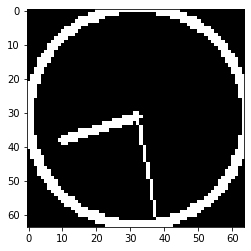

In [42]:
plt.imshow(val_data[rand_int], cmap ="gray")
plt.show()

In [43]:
print("The predicted hour is: "+ str(pred_hour[rand_int]))
print("The actual hour is: " + str(true_hour[rand_int]))

The predicted hour is: 8
The actual hour is: 8


In [44]:
print("The predicted minute value is: "+ str(y_hat[1][rand_int]))
print("The actual minute value is: " + str(m_val[rand_int]))

The predicted minute value is: [27.899036]
The actual minute value is: [28]


# Calculating Accuracy

In [45]:
min_acc = r2_score(y_hat[1], m_val)
hr_acc = accuracy_score(true_hour, pred_hour)
print(min_acc)
print(hr_acc)

0.9980830708421917
0.9425


In [46]:
from sklearn.metrics import confusion_matrix

In [53]:
labels = np.asarray(range(10))
cm = confusion_matrix(true_hour, pred_hour, labels)
print(cm)

[[30  0  0  0  2  0  0  0  0  0]
 [ 0 31  1  0  0  0  0  0  0  0]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  0 20  0  1  0  0  0  0]
 [ 0  0  0  0 35  1  0  0  0  0]
 [ 0  0  0  1  0 29  2  0  0  0]
 [ 0  0  0  0  0  0 31  1  0  0]
 [ 0  0  0  0  3  1  0 32  0  0]
 [ 0  0  0  0  0  0  0  0 36  0]
 [ 0  0  0  1  0  0  0  0  0 32]]


In [55]:
#installing skplt
! pip install -q scikit-plot

In [ ]:
import scikitplot as skplt

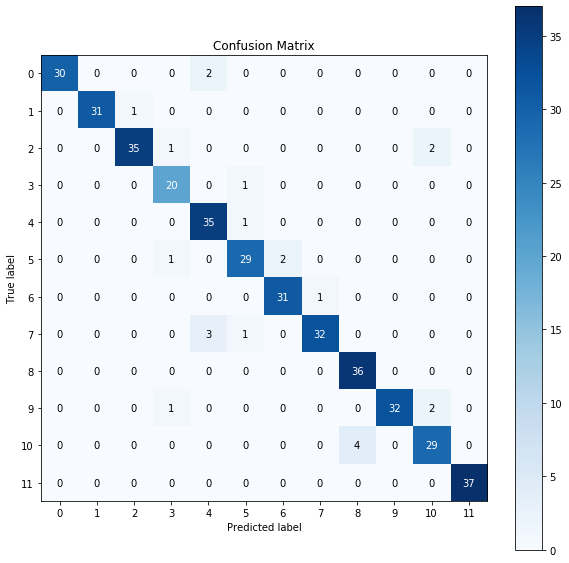

In [63]:
skplt.metrics.plot_confusion_matrix(true_hour,pred_hour,figsize=(10,10))
plt.show()